# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The following function may be useful for loading the necessary data.

In [2]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

In [3]:
def unreg_logistic_error(X, Y, w):
    '''
    Calculate the unregularized logistic error.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    total = 0.0
    for i in range(0, len(X)):
        check = Y[i]
        if i == -1:
            temp = 1 / (1 + np.exp(np.dot(w,X[i])))
        else:
            temp = 1 / (1 + np.exp(-np.dot(w,X[i])))
        total += np.log(temp)
        
    return total * -1    

def reg_logistic_error(X, Y, w, l):
    total = 0.0
    for i in range(len(X)):
        total += np.log((1 / (1 + np.exp(-Y[i] * np.dot(w,X[i])))) 
                      - (l/len(X))*np.dot(np.transpose(w), w))
    return total * -1

def gradient(x, y, w, l, N):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w and lambda l.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        l: Float for lambda value
        
    Output:
        The gradient of the loss with respect to x, y, and w and l. 
    '''

    return - (x * y / (np.exp(y * np.dot(w, x)) + 1) - 2 * l * w / N)

def normalize(X):
    for i in range(len(X)):
        for j in range(len(X[0])):
            col_avg = np.mean(X[:,j])
            col_std = np.std(X[:,j])
            X[i,j] = (X[i,j] - col_avg) / col_std

def SGD(X, Y, w_start, eta, N_epochs, l):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        l: A float for lambda value
        
    Outputs:
        W: A (N_epochs, D) shaped array containing the weight vectors from all iterations.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    
    
    w = np.empty((N_epochs, 13))
    losses = np.empty(N_epochs)
    new_w = w_start
    for q in range(N_epochs):
        for i in np.random.permutation(len(X)):
            new_w = new_w - eta * gradient(X[i], Y[i], new_w, l, N_epochs)
        w[q] = new_w
        losses[q] = reg_logistic_error(X, Y, new_w, l)
    
    return w, losses


In [4]:
data1 = load_data('data/wine_training1.txt')
N_epochs = 20000
X_train1 = data1[:, 1:]
normalize(X_train1)
Y_train1 = data1[:, 0]
init_weights = np.random.rand(13)/1000
lambdas = [0.00001]
lambda_len = 15
eta = 5e-4
for i in range(1,lambda_len):
    lambdas.append(lambdas[i-1] * 5)
weights = np.zeros((lambda_len, 13))
losses = np.zeros(lambda_len)
for i in range(lambda_len):
    temp_weights, temp_losses = SGD(X_train1, Y_train1, init_weights, eta, N_epochs, lambdas[i])
    losses[i] = np.mean(temp_losses)
    weights[i] = np.mean(temp_weights, axis=0)

C:\Users\tyll1\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in log


In [5]:
data2 = load_data('data/wine_training2.txt')
N_epochs = 20000
X_train2 = data1[:, 1:]
normalize(X_train2)
Y_train2 = data1[:, 0]
init_weights = np.random.rand(13)/1000
lambdas = [0.00001]
lambda_len = 15
eta = 5e-4
for i in range(1,lambda_len):
    lambdas.append(lambdas[i-1] * 5)
weights2 = np.zeros((lambda_len, 13))
losses2 = np.zeros(lambda_len)
for i in range(lambda_len):
    temp_weights, temp_losses = SGD(X_train1, Y_train1, init_weights, eta, N_epochs, lambdas[i])
    losses2[i] = np.mean(temp_losses)
    weights2[i] = np.mean(temp_weights, axis=0)

C:\Users\tyll1\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in log


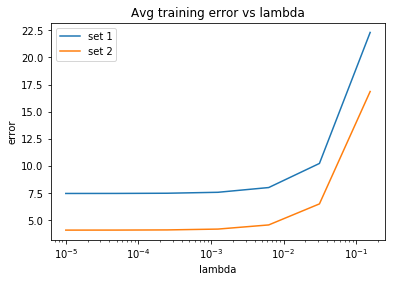

In [6]:
norm_w1 = np.linalg.norm(weights, axis=0)
norm_w2 = np.linalg.norm(weights2, axis=0)

plt.figure()
plt.plot(lambdas, losses, label='set 1')
plt.plot(lambdas, losses2, label='set 2')
plt.xscale('log')
plt.legend()
plt.title('Avg training error vs lambda')
plt.xlabel('lambda')
plt.ylabel('error')

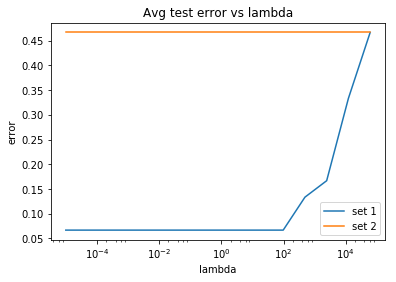

In [10]:
test_data = load_data('data/wine_testing.txt')
X_test = test_data[:, 1:]
normalize(X_test)
Y_test = test_data[:, 0]



mistakes1 = np.zeros(len(lambdas))
mistakes2 = np.zeros(len(lambdas))
for i in range(len(lambdas)):
    count = 0
    count2 = 0
    classes1 = np.sign(np.dot(weights, np.transpose(X_test)))
    classes2 = np.sign(np.dot(weights2, np.transpose(X_test)))
    for j in range(len(Y_test)):
        if (classes1[i][j] != Y_test[j]):
            count += 1
        if (classes2[i][j] != Y_test[j]):
            count2 += 1
    mistakes1[i] = count / len(Y_test)
    mistakes2[i] = count2 / len(Y_test)
    
plt.figure()
plt.plot(lambdas, mistakes1, label='set 1')
plt.plot(lambdas, mistakes2, label='set 2')
plt.xscale('log')
plt.legend()
plt.title('Avg test error vs lambda')
plt.xlabel('lambda')
plt.ylabel('error')

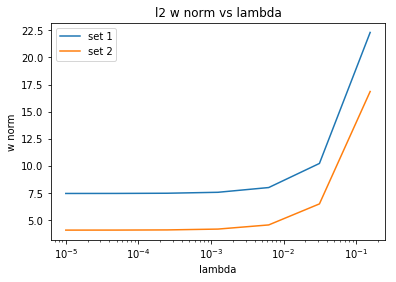

In [11]:
plt.figure()
plt.plot(lambdas, losses, label='set 1')
plt.plot(lambdas, losses2, label='set 2')
plt.xscale('log')
plt.legend()
plt.title('l2 w norm vs lambda')
plt.xlabel('lambda')
plt.ylabel('w norm')

In [9]:
lambdas

[1e-05,
 5e-05,
 0.00025,
 0.00125,
 0.00625,
 0.03125,
 0.15625,
 0.78125,
 3.90625,
 19.53125,
 97.65625,
 488.28125,
 2441.40625,
 12207.03125,
 61035.15625]